# Система розпізнавання породи собаки на фото

## Створемо датасет для 9 пород собак

In [ ]:
# Переіменуємо скачані фото відповідно до пород
import os

folder_path = 'C:/Users/Asus/Desktop/dog-breeds/poodle'  # Шлях до папки з породою
base_name = 'poodle'  # Базове ім'я файлу

file_list = os.listdir(folder_path)

for index, file_name in enumerate(file_list, start=1):
    file_ext = os.path.splitext(file_name)[1]  # Розширення файлу
    new_name = f"{base_name}{index}{file_ext}"  # Нове ім'я файлу з номером
    file_path = os.path.join(folder_path, file_name)
    new_path = os.path.join(folder_path, new_name)
    os.rename(file_path, new_path)

In [2]:
# Втановлюємо необхідні модулі
!pip install tensorflow
!pip install keras

In [1]:
# Завантажемо бібліотеки
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from PIL import Image

In [2]:
# Завантажуємо наші зображення
path="C:/Users/Asus/PycharmProjects/DogDetect/dog-breeds"
dogs=os.listdir(path)
dogs # Дивимось які є папки з породами

['beagle',
 'bulldog',
 'cocker-spaniel',
 'dalmatian',
 'german-shepherd',
 'husky',
 'labrador-retriever',
 'poodle',
 'rottweiler']

In [3]:
images=[] # Створюємо список шляхів до цих зображень
dog_breed=[] # Створюємо список порід собак, до яких належать ці зображення

# Циклом заповнюємо списки
for dog in dogs:
    directory=path +  "/" + dog + "/"
    for image in os.listdir(directory):
        images.append(directory + image)
        dog_breed.append(dog)   

In [4]:
# Створюємо серію зі списка з шляхами зображень
Images = pd.Series(images, name="Image").astype(str)

In [5]:
# Дивимось пеші записи серії
Images.head()

0    C:/Users/Asus/PycharmProjects/DogDetect/dog-br...
1    C:/Users/Asus/PycharmProjects/DogDetect/dog-br...
2    C:/Users/Asus/PycharmProjects/DogDetect/dog-br...
3    C:/Users/Asus/PycharmProjects/DogDetect/dog-br...
4    C:/Users/Asus/PycharmProjects/DogDetect/dog-br...
Name: Image, dtype: object

In [6]:
# З серії робимо датасет додаючи колонку з породами собак
dog_breed=pd.Series(dog_breed, name="Breed")
data=pd.concat([Images, dog_breed], axis=1)
data.head()

,Image,Breed
0,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,beagle
1,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,beagle
2,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,beagle
3,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,beagle
4,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,beagle


In [7]:
# Перемішуємо дані у датасеті для подальшого розділення тренувальної та навчальної частин
data=data.sample(frac=1).reset_index(drop = True)

In [8]:
# Подивимось на результат перемішення
data

,Image,Breed
0,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,rottweiler
1,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,beagle
2,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,labrador-retriever
3,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,rottweiler
4,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,poodle
...,...,...
1177,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,rottweiler
1178,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,cocker-spaniel
1179,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,beagle
1180,C:/Users/Asus/PycharmProjects/DogDetect/dog-br...,rottweiler


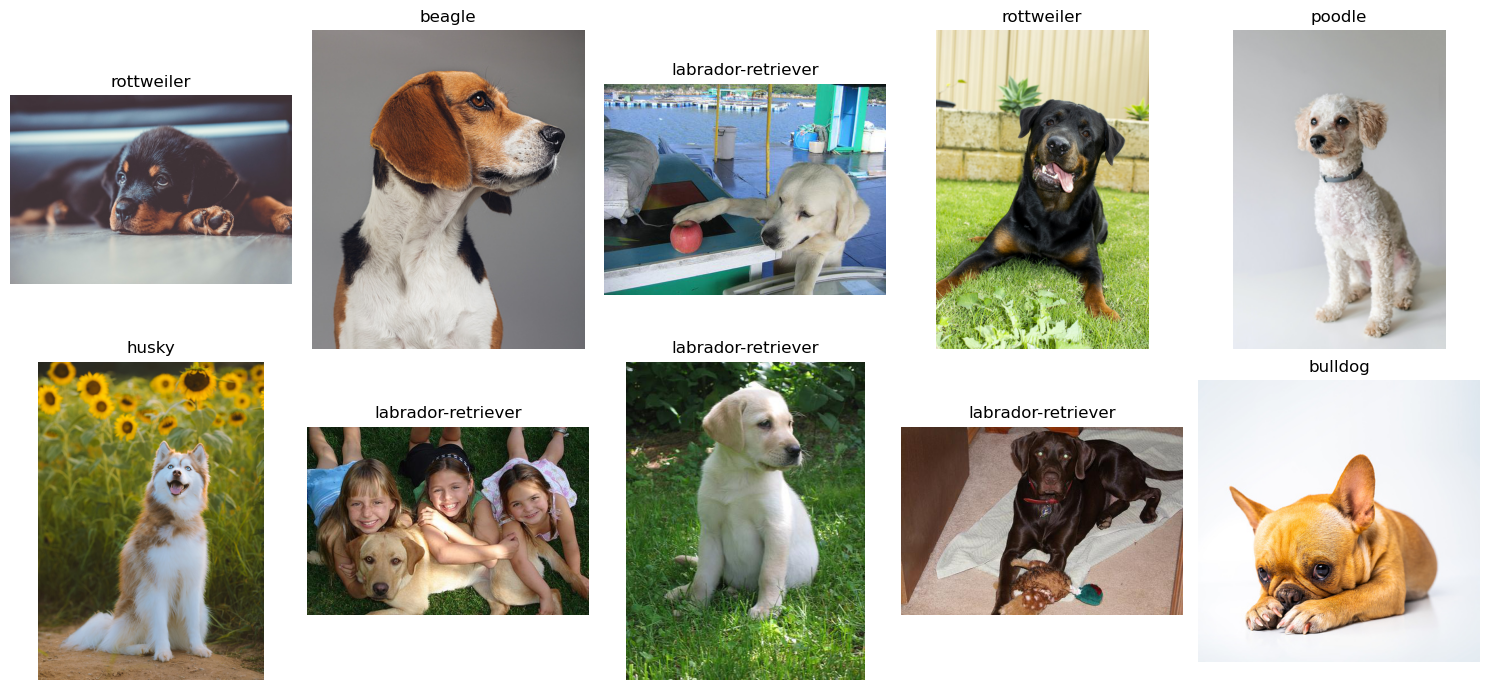

In [9]:
# Подивимось на зображення

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))

for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(data.loc[i, "Image"]))
    ax.set_title(data.loc[i, "Breed"])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Завантажемо модуль для розділення датасету
from sklearn.model_selection import train_test_split

In [11]:
# Розділимо наші зображення на навчальні та тестові
train, test = train_test_split(data, train_size=0.9, shuffle=True, random_state=42)

## Створемо генератор зображень для навчання моделі та її тестування

In [12]:
# Завантажемо модуль для генерації зображень
import keras
from keras.preprocessing.image import ImageDataGenerator

In [13]:
# Створемо генератор зображень для тренування моделі
train_generator = ImageDataGenerator(
    rescale=1./255,                 # нормалізація пікселій яка сприяє кращій збіжності під час тренування
    shear_range=0.2,                # випадково застосовує зсув (перекос) до зображення з кутом в межах від -20 до 20 градусів
    rotation_range=40,              # випадково повертає зображення на випадковий кут в межах від -40 до 40 градусів
    height_shift_range=0.2,         # випадково зсуває зображення вертикально на випадкову відстань від 0 до 20% висоти зображення
    width_shift_range=0.2,          # випадково зсуває зображення горизонтально на випадкову відстань від 0 до 20% ширини зображення
    zoom_range=0.2,                 # випадково масштабує зображення на випадковий коефіцієнт в межах від 0.8 до 1.2
    horizontal_flip=True,           # випадково перевертає зображення горизонтально
    fill_mode="nearest",            # заповнювати можливі порожні місця значеннями найближчих пікселів
    validation_split=0.2            # 20% даних для валідації, решта 80% будуть використовуватися для тренування
)

In [14]:
# Створемо генератор зображень для тестування моделі
test_generator = ImageDataGenerator(
    rescale=1./255                  # нормалізація пікселій 
)

In [15]:
# Генеруємо тренувальні зображення
train_images = train_generator.flow_from_dataframe(
    dataframe=train,               # вхідний датафрейм, використовуємо train частину
    x_col='Image',                 # назва стовпця в датафреймі, який містить шляхи до зображень
    y_col='Breed',                 # назва стовпця в датафреймі, який містить мітки класів (породи)
    color_mode='rgb',              # режим кольору зображення, який встановлюється на "rgb"
    target_size=(224, 224),        # розмір, до якого будуть змінені всі вхідні зображення - 224*224
    shuffle=True,                  # перемішаємо дані перед кожною епохою
    class_mode='categorical',      # режим класифікації, встановлюємо на "categorical"
    batch_size=32,                 # розмір пакета зображень, які будуть використовуватися для навчання
    subset='training',             # підмножину даних встановлюємо тренування
    seed=42                        # зафіксуємо початковий стан генератора випадкових чисел
)

Found 851 validated image filenames belonging to 9 classes.


In [16]:
# Валідаційні зображення
val_images = train_generator.flow_from_dataframe(
    dataframe=train,                # вхідний датафрейм використовуємо train частину 
    x_col='Image',                  # назва стовпця в датафреймі, який містить шляхи до зображень
    y_col='Breed',                  # назва стовпця в датафреймі, який містить мітки класів (породи)
    color_mode='rgb',               # режим кольору зображення, який встановлюється на "rgb"
    target_size=(224, 224),         # розмір, до якого будуть змінені всі вхідні зображення - 224*224
    shuffle=True,                   # перемішаємо дані перед кожною епохою
    class_mode='categorical',       # режим класифікації, встановлюємо на "categorical"
    batch_size=32,                  # розмір пакета зображень, які будуть використовуватися для навчання
    subset='validation',             # підмножину даних встановлюємо валідація
    seed=42                         # зафіксуємо початковий стан генератора випадкових чисел
)

Found 212 validated image filenames belonging to 9 classes.


In [17]:
# Тестові зображення
test_images = test_generator.flow_from_dataframe(
    dataframe=test,                 # вхідний датафрейм використовуємо test частину 
    x_col='Image',                  # назва стовпця в датафреймі, який містить шляхи до зображень
    y_col='Breed',                  # назва стовпця в датафреймі, який містить мітки класів (породи)
    color_mode='rgb',               # режим кольору зображення, який встановлюється на "rgb"
    target_size=(224, 224),         # розмір, до якого будуть змінені всі вхідні зображення - 224*224
    shuffle=False,                  # не будемо перемішувати дані перед кожною епохою
    class_mode=None,                # режим класифікації не встановлюємо
    batch_size=32                   # розмір пакета зображень, які будуть використовуватися для тестування
)

Found 119 validated image filenames.


## Використаємо переднавчану модель ResNet50V2 для класифікації зображень


### Схема переднавчаної моделі ResNet50V2
Моделі ResNet (Residual Network) (34, 50, 101) це «залишкові» CNN для класифікації зображень. 

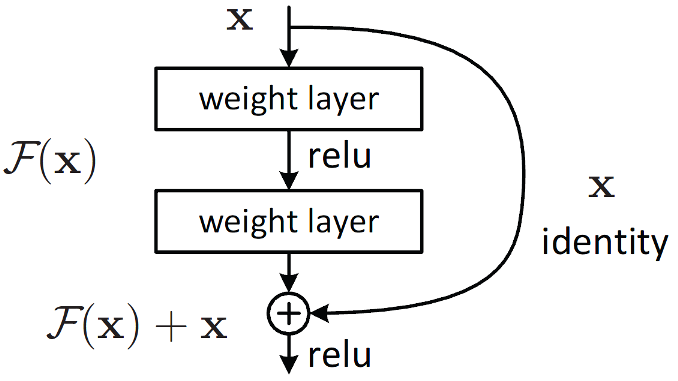

### Для чого були створені моделі ResNet (Residual Network).

Коли більш глибока мережа починає згортатися - виникає проблема: зі збільшенням глибини мережі точність спочатку збільшується, а потім швидко знижується. Зниження точності навчання показує, що не всі мережі легко оптимізувати. 

Щоб подолати цю проблему, Microsoft запровадила глибоку «залишкову» структуру навчання. Замість того, щоб сподіватися, що кожні кілька stacked layers безпосередньо відповідають бажаному основному уявленню, вони явно дозволяють цим шарам відповідати «залишковому». Формулювання F(x) + x може бути реалізовано за допомогою нейронних мереж зі з'єднаннями для швидкого доступу. 

З'єднання швидкого доступу (shortcut connections) пропускають один або кілька шарів і виконують зіставлення ідентифікаторів. Їхні виходи додаються до виходів stacked layers. Модель ResNet50V2 попередньо навчена на наборі даних ImageNet. 

ImageNet - це набір даних мільйонів позначених зображень з високою роздільною здатністю, що відносяться приблизно до 22 тисяч категорій. Зображення були зібрані з Інтернету та позначені людьми за допомогою краудсорсингу.

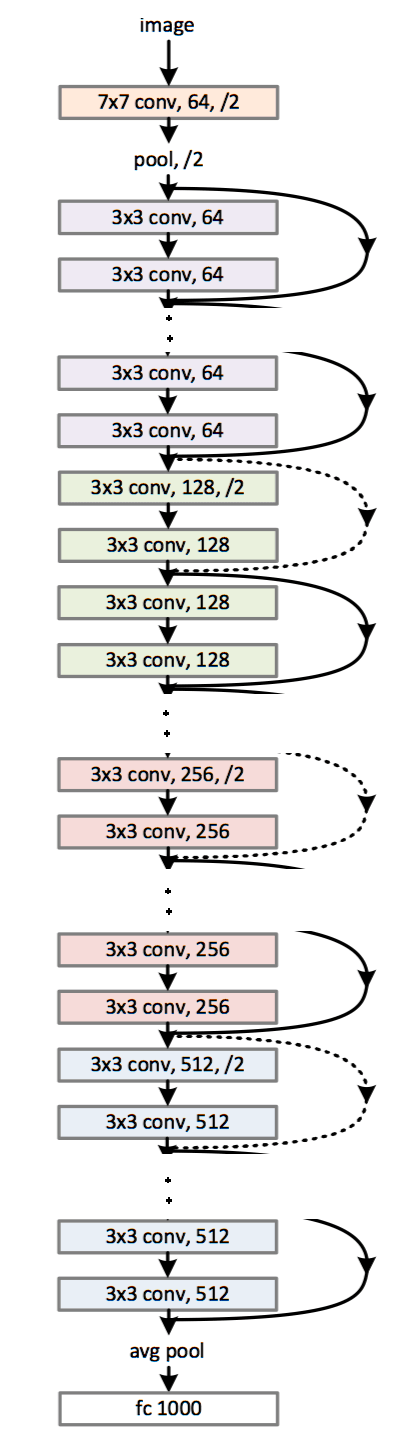

In [18]:
# Завантажемо необхідні модулі, шари та функції
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.applications import ResNet50V2

In [19]:
# Визначаємо бажаний розмір вхідного зображення
input_shape = (224, 224, 3)

In [20]:
# Ініціалізуємо модель ResNet50V2 як базову модель
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=input_shape) 

# Аргумент include_top=False забезпечує виключення верхнього рівня класифікації моделі ResNet50V2

In [21]:
# Замороземо шари в попередньо навченій моделі, щоб запобігти оновленню їх ваг під час навчання.
# Це корисно, коли маєто справу з обмеженими тренувальними даними, 
# щоб уникнути перенавчання та використовувати попередньо підготовлені ваги
for layer in base_model.layers:
    layer.trainable = False

## Архітектура моделі:

Створюється послідовна модель Sequential.
Базова модель додається як перший рівень. 

In [22]:
# Створюємо модель
model = Sequential()

# Додаємо базову модель як перший шар
model.add(base_model)

# Додайємо додаткові шари для класифікації
model.add(GlobalAveragePooling2D())                 # зменьшуємо просторові розміри результату  - обчислюємо середнє значення   
                                                    # для кожного каналу зображення і повертаємо одне значення для кожного каналу
model.add(Dense(512, activation='relu'))            # повнозв'язний шар з 512 нейронами, активація функцією ReLU
model.add(BatchNormalization())                     # нормалізуємо виходи попереднього шару
model.add(Dropout(0.5))                             # регуляризація моделі та запобігання перенавчання, вимикаємо 50% нейронів
model.add(Dense(256, activation='relu'))            # згортаємо мережу - повнозв'язний шар 256 нейронів
model.add(BatchNormalization())                     # нормалізуємо виходи попереднього шару
model.add(Dropout(0.5))                             # регуляризація моделі та запобігання перенавчання, вимикаємо 50% нейронів
model.add(Dense(9, activation='softmax'))           # повнозв'язний шар 9 нейронів, що відповідають 9 класам
                                                    # функція активації softmax, яка обчислює ймовірності належності  
                                                    # вхідних даних до кожного з класів

In [23]:
# Скомпілюємо модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               1

## Навчання моделі:
Ми навчаємо модель на даних навчання `train_images` і перевіряємо її на даних перевірки `val_images`, використовуючи надані параметри навчання.

Де `earlystopping`: зупиняє тренування, якщо модель не покращується (не знижує втрату) протягом patience епох. У даному випадку, якщо протягом 4 епох втрата не зменшилась, тренування буде зупинено.

Та `reduce_lr` : зменшує швидкість навчання (learning rate) моделі, якщо втрата не знижується протягом patience епох. Це допомагає моделі краще знаходити глобальний мінімум функції втрати

In [24]:
# Навчаємо модель
batch_size = 32
history = model.fit(train_images, validation_data=val_images, epochs=15, batch_size=batch_size, callbacks=[EarlyStopping(patience=4), ReduceLROnPlateau()])


Epoch 1/15
27/27 [==============================] - 300s 11s/step - loss: 1.2076 - accuracy: 0.6357 - mse: 0.0553 - val_loss: 0.8395 - val_accuracy: 0.7877 - val_mse: 0.0378 - lr: 0.0010
Epoch 2/15
27/27 [==============================] - 290s 11s/step - loss: 0.3822 - accuracy: 0.8766 - mse: 0.0198 - val_loss: 0.3618 - val_accuracy: 0.9009 - val_mse: 0.0162 - lr: 0.0010
Epoch 3/15
27/27 [==============================] - 286s 11s/step - loss: 0.3594 - accuracy: 0.8884 - mse: 0.0191 - val_loss: 0.4212 - val_accuracy: 0.8915 - val_mse: 0.0179 - lr: 0.0010
Epoch 4/15
27/27 [==============================] - 296s 11s/step - loss: 0.2998 - accuracy: 0.9025 - mse: 0.0156 - val_loss: 0.3740 - val_accuracy: 0.9009 - val_mse: 0.0167 - lr: 0.0010
Epoch 5/15
27/27 [==============================] - 295s 11s/step - loss: 0.2949 - accuracy: 0.9177 - mse: 0.0147 - val_loss: 0.3217 - val_accuracy: 0.9245 - val_mse: 0.0140 - lr: 0.0010
Epoch 6/15
27/27 [==============================] - 287s 11s/step

## Висновок:
Ми реалізували модель ResNet50V2 для класифікації зображень за допомогою Keras. 

Модель ResNet50V2, попередньо навчена на наборі даних ImageNet, служить потужним екстрактором функцій. 

Заморозивши попередньо підготовлені шари та додавши додаткові шари для класифікації, ми змогли досягти хорошої продуктивності в нашому завданні класифікації зображень пород собак.

## Візуалізація показників навчання та перевірки

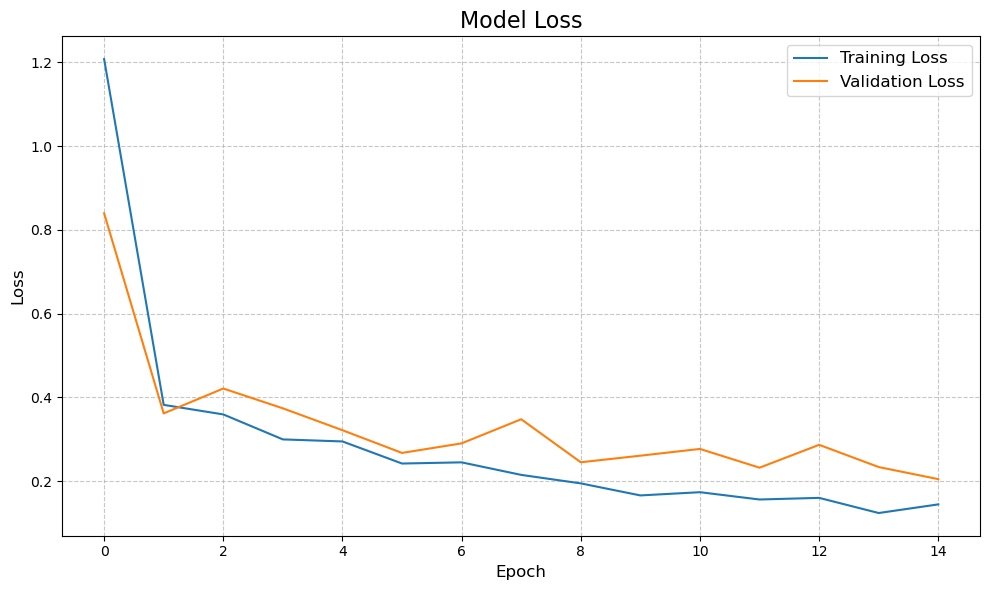

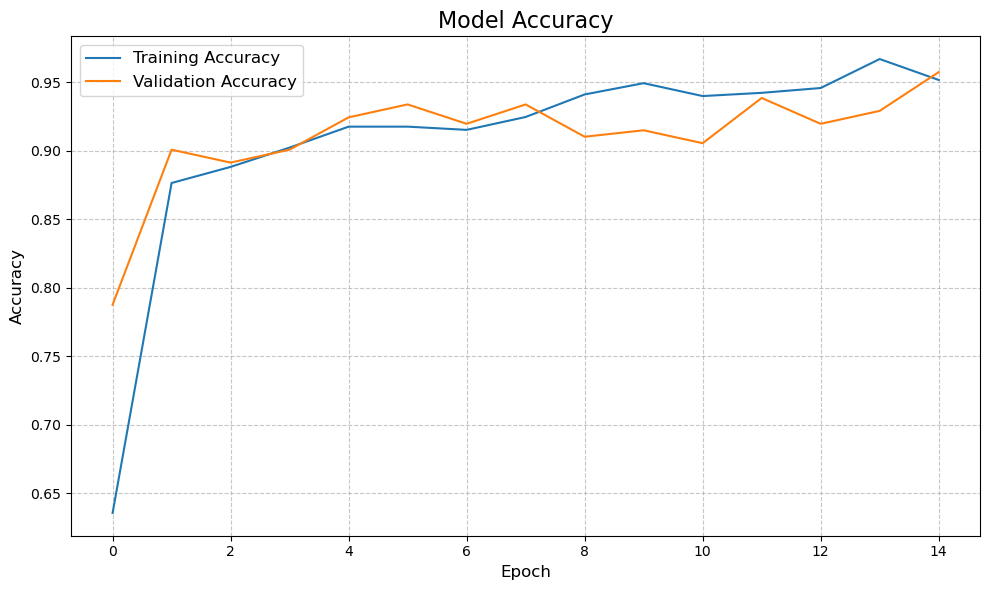

In [26]:
# Намалюємо граіфк втрат моделі
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Намалюємо графік точності моделі
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
img_pred=model.predict(test_images)
img_pred=np.argmax(img_pred, axis=1)

4/4 [==============================] - 31s 7s/step


In [28]:
final=train_images.class_indices
final

{'beagle': 0,
 'bulldog': 1,
 'cocker-spaniel': 2,
 'dalmatian': 3,
 'german-shepherd': 4,
 'husky': 5,
 'labrador-retriever': 6,
 'poodle': 7,
 'rottweiler': 8}

In [29]:
labels = dict((v,k) for k,v in final.items())
y_pred = [labels[k] for k in img_pred]

In [30]:
test.reset_index(drop=True, inplace=True)

## Оцінка точності

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
y_test=test["Breed"].values

In [33]:
accuracy_score(y_pred, y_test)

0.9327731092436975

In [34]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            beagle       0.86      1.00      0.92         6
           bulldog       1.00      1.00      1.00         9
    cocker-spaniel       1.00      0.83      0.91        12
         dalmatian       1.00      1.00      1.00         5
   german-shepherd       0.90      0.95      0.92        19
             husky       0.82      1.00      0.90         9
labrador-retriever       1.00      0.90      0.95        30
            poodle       0.92      0.96      0.94        23
        rottweiler       0.83      0.83      0.83         6

          accuracy                           0.93       119
         macro avg       0.93      0.94      0.93       119
      weighted avg       0.94      0.93      0.93       119



## Візуалізація передбачених міток

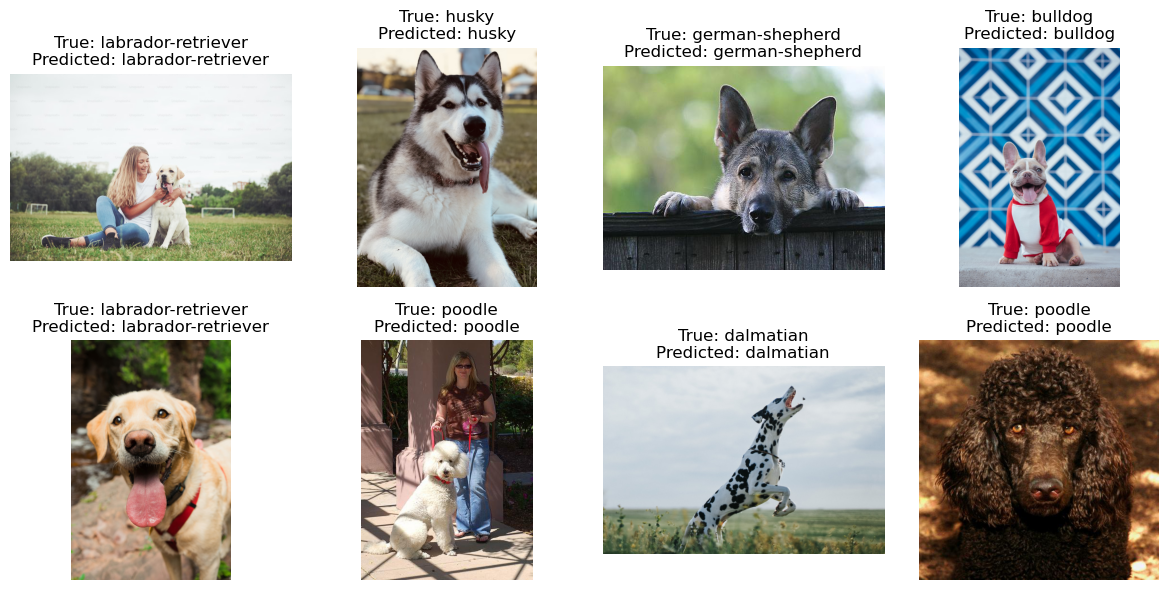

In [35]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Assuming you have a DataFrame called 'test' containing image paths and labels

num_images = 8
rows = 2
cols = num_images // rows

# Generate random indices to select unique images
indices = random.sample(range(test.shape[0]), num_images)

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i in range(num_images):
    row = i // cols
    col = i % cols
    index = indices[i]
    img_path = test.loc[index, "Image"]
    true_label = test.loc[index, "Breed"]
    predicted_label = y_pred[index]
    
    img = Image.open(img_path)
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()


In [36]:
# from keras.models import load_model

# # Збережемо модель у файлі
# model.save('dog_breed_model.h5')


In [37]:
import tensorflow as tf

# Збереження моделі у форматі SavedModel
tf.saved_model.save(model, 'dog_breed_model')

INFO:tensorflow:Assets written to: dog_breed_model\assets


INFO:tensorflow:Assets written to: dog_breed_model\assets


## Створемо веб-додаток для користування нашою моделлю

In [38]:
%%writefile dog_breed_app.py

import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

# Завантажуємо модель
model = tf.saved_model.load('dog_breed_model')

# Завантажуємо список назв порід собак
breed_names = ['Бігль', 'Бульдог', 'Кокер-спаніель', 'Далматинець', 'Німецька вівчарка', 'Хаскі', 'Лабрадор', 'Пудель', 'Ротвеллер']

# Функція для передбачення за допомогою моделі
def predict(image):
    image = image.resize((224, 224))
    image = np.array(image) / 255.0
    image = image.astype(np.float32)
    image = np.expand_dims(image, axis=0)
    prediction = model(image)
    predicted_class = np.argmax(prediction)
    predicted_breed = breed_names[predicted_class]
    return predicted_breed

# Заголовок сторінки
st.title('Розпізнавання порід собак')

# Завантаження фото
uploaded_file = st.file_uploader('Завантажте фото собаки', type=['jpg', 'jpeg', 'png'])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Завантажене фото', use_column_width=True)

    # Виконуємо передбачення при натисканні кнопки
    if st.button('Почати розпізнавання'):
        prediction = predict(image)
        st.write('Результати передбачення:')
        st.write(prediction)


Overwriting dog_breed_app.py


In [39]:
%run dog_breed_app.py

2023-07-15 18:34:06.369 
  command:

    streamlit run dog_breed_app.py [ARGUMENTS]
